<a href="https://colab.research.google.com/github/rezabudi29/ProjectOngoing-/blob/master/Research_Smart_Signal___Training_Smart_Signal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time, matplotlib, re, os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from os import listdir
from os.path import isfile, isdir
from scipy.signal import lfilter, butter, cheby1
%tensorflow_version 2.x

plt.style.use('seaborn')
matplotlib.rcParams['figure.figsize'] = (14,5)
matplotlib.rcParams['figure.dpi'] = 100

In [ ]:
# ============================ Isi bagian ini aja ============================ #
SubEquipment = 'bearing generator'
System = 'Steam Turbine System'
ParentFolder = "/content/drive/My Drive/Work/Data Paiton 1/Historian5/"
# ============================================================================ #

SubEquipment = SubEquipment.upper().strip().replace(' ', '_')
System = System.capitalize().replace('_',' ').strip()
if not ParentFolder.endswith('/'): ParentFolder += '/'
for c in re.findall(' ([a-z]{5})', System):
    System = System.replace(c, c.capitalize())
print(f'Loading from {System} - {SubEquipment}.')

FolderTujuan = f'{ParentFolder}Research models/pickle/{System}/'
FolderTujuan_model = FolderTujuan.replace('pickle','model')
FolderTujuan_log = FolderTujuan.replace('pickle','log')

equip = pd.read_excel(f"{ParentFolder}{SubEquipment}_5.xlsx", index_col='timestamp')
# equip = pd.read_excel(f"{ParentFolder}{SubEquipment}_5.xlsx".replace('5','30'), index_col='timestamp')
tags = pd.read_excel("/content/drive/My Drive/Work/Data Paiton 1/PAITON1_TAGS_11_08_2017_10_26_EXPORT.xlsx", index_col='NAME')

Loading from California data - CALIFORNIA_HOUSING_TRAIN.


FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
if not isdir(FolderTujuan): os.mkdir(FolderTujuan)
if not isdir(FolderTujuan_model): os.mkdir(FolderTujuan_model)
if not isdir(FolderTujuan_log): os.mkdir(FolderTujuan_log)

NameError: ignored

In [ ]:
file = [f+'\n' for f in np.array(equip.columns)]
f = open(FolderTujuan + 'Paiton1_' + SubEquipment + '_columnlist.txt','w')
f.writelines(file)
f.close()

In [ ]:
ts = np.array(equip.index)
deltats = []
for i in range(1, len(ts)):
    deltats.append(ts[i] - ts[i-1])

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
equip.to_numpy().shape

(85459, 8)

In [ ]:
ts_long = np.arange(ts[0], ts[-1] + np.timedelta64(5, 'm'), np.timedelta64(5, 'm'))
equip_long = pd.DataFrame(np.full([len(ts_long), len(equip.columns)], np.nan), columns=equip.columns, index=ts_long)

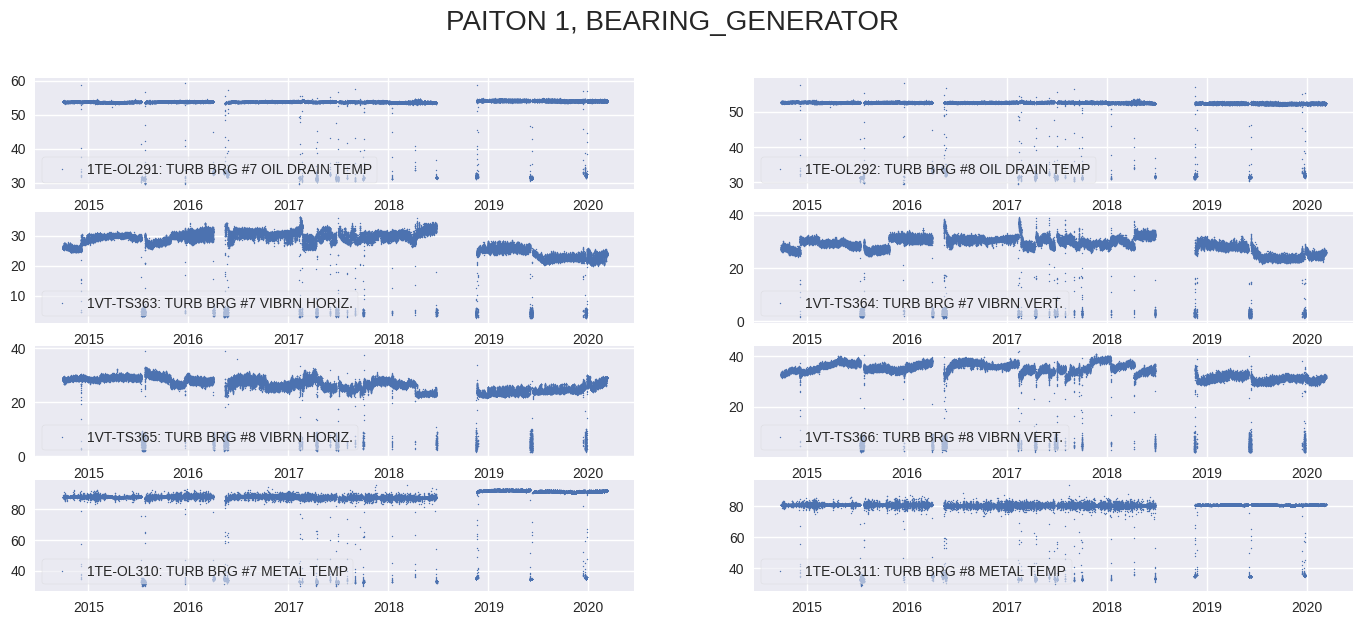

In [ ]:
plt.figure(figsize=(17,len(equip.columns)*.6+2), dpi=100)
equip_long = equip_long.combine_first(equip)
plt.suptitle(f"PAITON 1, {SubEquipment}", fontsize=20)
for i in range(len(equip_long.columns)):
    plt.subplot((len(equip_long.columns)+1)//2,2,i+1)
    plt.plot(equip_long.index, equip_long[equip_long.columns[i]], 'o', markersize=1, label=f"{equip_long.columns[i]}: {tags['DESC'].loc[equip_long.columns[i]]}")
    plt.legend(loc='lower left', frameon=True, framealpha=.6)
plt.show()

In [ ]:
def createDataset (data, jml_in, jml_out, frombefore=0):
    datareturn1 = []
    datareturn2 = []
    for i in range(jml_in, len(data)+1-(jml_out-frombefore)):
        d1 = data[i-jml_in:i]
        d2 = data[i-frombefore:i+jml_out-frombefore]
        if np.max(np.isnan(data[i-jml_in:i+jml_out])): continue
        datareturn1.append(d1)
        datareturn2.append(d2)
    datareturn1 = np.array(datareturn1)
    datareturn2 = np.array(datareturn2)
    return datareturn1, datareturn2

In [ ]:
hphlong_arr = equip_long.to_numpy()
np.argwhere(np.isnan(hphlong_arr))

array([[ 21804,      0],
       [ 21804,      1],
       [ 21804,      2],
       ...,
       [570713,      5],
       [570713,      6],
       [570713,      7]])

In [ ]:
from sklearn.externals import joblib 

hphlong_arr2 = np.nan_to_num(hphlong_arr)

scaler = MinMaxScaler()
scaler.fit(hphlong_arr2)

joblib.dump(scaler, FolderTujuan + 'Paiton1_' + SubEquipment + '_scaler.pkl') 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['/content/drive/My Drive/Work/Data Paiton 1/Historian5/Research models/pickle/Paiton1_CIRCULATING_WATER_PUMP_B_scaler.pkl']

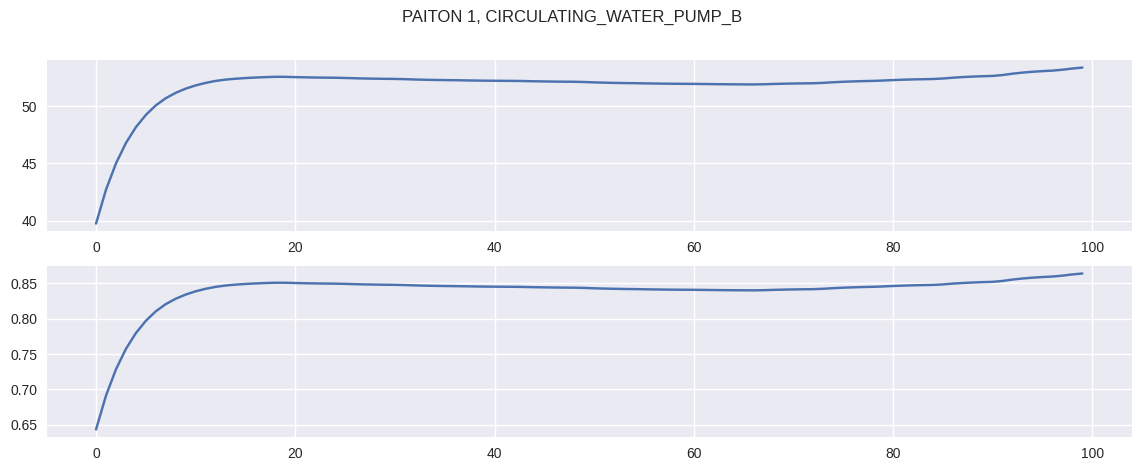

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

plt.style.use('seaborn')
matplotlib.rcParams['figure.figsize'] = (14,5)
matplotlib.rcParams['figure.dpi'] = 100

plt.subplot(211)
plt.suptitle(f"PAITON 1, {SubEquipment}")
plt.plot(hphlong_arr[:100,0])
plt.subplot(212)
plt.plot(scaler.transform(hphlong_arr)[:100, 0])

In [ ]:
Xtr, Ytr = createDataset(scaler.transform(hphlong_arr), 12, 1)
print(Xtr.shape, Ytr.shape)

(350040, 12, 8) (350040, 1, 8)


In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger, ModelCheckpoint

timesteps = Xtr.shape[1]
features = Xtr.shape[2]
earlystop = EarlyStopping(monitor='loss', patience=10)
logger = CSVLogger(f"{FolderTujuan_log}/log_{SubEquipment}.csv", append=True)
checkpoint = ModelCheckpoint(FolderTujuan_model + 'Paiton1_' + SubEquipment + f'_insight.h5', monitor='loss', save_best_only=True)
lstmlayer = max(equip.to_numpy().shape[1] + 3, 13)

try:
    model = load_model(FolderTujuan_model + 'Paiton1_' + SubEquipment + f'_insight.h5')
    print('Model loaded from:', FolderTujuan_model + 'Paiton1_' + SubEquipment + f'_insight.h5')
    print("Evaluation loss:", round(model.evaluate(Xtr, Ytr.reshape(-1, features)), 8))
except:
    model = Sequential()
    model.add(LSTM(lstmlayer, input_shape=(timesteps, features), return_sequences=True, activation='relu'))
    model.add(LSTM(features, return_sequences=False, activation='relu'))

    model.compile(optimizer='rmsprop', loss='mse')
print(f"PAITON 1, {SubEquipment}")
model.summary()

Model loaded from: /content/drive/My Drive/Work/Data Paiton 1/Historian5/Research models/model/Paiton1_CIRCULATING_WATER_PUMP_B_insight.h5
10939/10939 [==============================] - 24s 2ms/step - loss: 3.1513e-06
Evaluation loss: 3.15e-06
PAITON 1, CIRCULATING_WATER_PUMP_B
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 12, 13)            1144      
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 704       
Total params: 1,848
Trainable params: 1,848
Non-trainable params: 0
_________________________________________________________________


# New section

# New section

In [ ]:
history = model.fit(Xtr, Ytr.reshape(-1, features), epochs=1, batch_size=1024) 

342/342 [==============================] - 8s 24ms/step - loss: 2.8235e-06


In [ ]:
history = model.fit(Xtr, Ytr.reshape(-1, features), epochs=1000, callbacks=[earlystop, logger, checkpoint], verbose=2) 

Epoch 1/1000
10939/10939 - 81s - loss: 2.8635e-06
Epoch 2/1000
10939/10939 - 81s - loss: 2.8642e-06
Epoch 3/1000
10939/10939 - 83s - loss: 2.8589e-06
Epoch 4/1000
10939/10939 - 83s - loss: 2.8563e-06
Epoch 5/1000
10939/10939 - 82s - loss: 2.8559e-06
Epoch 6/1000
10939/10939 - 82s - loss: 2.8535e-06
Epoch 7/1000
10939/10939 - 82s - loss: 2.8503e-06
Epoch 8/1000
10939/10939 - 82s - loss: 2.8479e-06
Epoch 9/1000
10939/10939 - 81s - loss: 2.8455e-06
Epoch 10/1000
10939/10939 - 82s - loss: 2.8433e-06
Epoch 11/1000
10939/10939 - 81s - loss: 2.8444e-06
Epoch 12/1000
10939/10939 - 82s - loss: 2.8390e-06
Epoch 13/1000
10939/10939 - 83s - loss: 2.8353e-06
Epoch 14/1000
10939/10939 - 82s - loss: 2.8319e-06
Epoch 15/1000
10939/10939 - 83s - loss: 2.8316e-06
Epoch 16/1000
10939/10939 - 85s - loss: 2.8308e-06
Epoch 17/1000
10939/10939 - 82s - loss: 2.8281e-06
Epoch 18/1000
10939/10939 - 80s - loss: 2.8253e-06
Epoch 19/1000
10939/10939 - 83s - loss: 2.8233e-06
Epoch 20/1000
10939/10939 - 83s - loss: 

In [ ]:
plt.figure(figsize=(6,3))
plt.subplot(211)
plt.suptitle(f"PAITON 1, {SubEquipment}")
plt.plot(history.history['loss'])
plt.subplot(212)
d = pd.read_csv(f"{FolderTujuan_log}/log_{SubEquipment}.csv")
plt.plot(d['loss'].to_numpy()[-50:])
plt.show()
print('Loss:', history.history['loss'][-1])
if not isfile(FolderTujuan_model + 'Paiton1_' + SubEquipment + f'_insight.h5'):
    model.save(FolderTujuan_model + 'Paiton1_' + SubEquipment + f'_insight.h5')
print("Model saved to:", FolderTujuan_model + 'Paiton1_' + SubEquipment + f'_insight.h5')

In [ ]:
no = np.random.randint(4, len(Xtr)-12)
print(no)
tags = np.random.randint(0, features, 3)
futurepred = 12

plt.figure(figsize=(16,7))
for n, tag in enumerate(tags):
    Xte = np.array(Xtr[no])
    for i in range(futurepred):
        hasil = model.predict(Xte[-timesteps:].reshape(1, timesteps, features))
        Xte = np.append(Xte, hasil, axis=0)
    Yte = scaler.inverse_transform(Xte[12:]).reshape(-1,features)
    plt.subplot(len(tags), 1, n+1)
    plt.plot(ts_long[no:no+timesteps], scaler.inverse_transform(Xtr[no])[:,tag], label=equip.columns[tag])
    plt.plot(ts_long[no+timesteps:no+timesteps+futurepred], scaler.inverse_transform(Xtr[no+timesteps])[:,tag], c="C1", alpha=.4, label='Sinyal asli')
    plt.plot(ts_long[no+timesteps:no+timesteps+futurepred], Yte[:,tag], c="C1", label='Sinyal prediksi')
    plt.legend(loc='lower left')